In [1]:
import pandas as pd
import numpy as np
import joblib
df = pd.read_csv("Backend/dataset/diabetic_data.csv")

In [2]:
df = df.replace("?", np.nan).replace("None", np.nan)
df.count().sort_values()

weight                        3197
max_glu_serum                 5346
A1Cresult                    17018
medical_specialty            51817
payer_code                   61510
race                         99493
diag_3                      100343
diag_2                      101408
diag_1                      101745
encounter_id                101766
glyburide                   101766
tolbutamide                 101766
pioglitazone                101766
rosiglitazone               101766
acarbose                    101766
miglitol                    101766
tolazamide                  101766
glipizide                   101766
examide                     101766
citoglipton                 101766
insulin                     101766
glyburide-metformin         101766
glipizide-metformin         101766
glimepiride-pioglitazone    101766
metformin-rosiglitazone     101766
metformin-pioglitazone      101766
change                      101766
troglitazone                101766
acetohexamide       

After a quick verification of the values, we see that "weight" and "max_glu_serum" are not enough filled to be considered that useful with the size of the dataframe (3% and 5%filled)
We also decided to remove the columns "payer_code" and "encounter_id" since they do not provide information correlated with a possibility of readmission

In [3]:
df = df.drop(columns=["weight", "max_glu_serum", "payer_code", "encounter_id"])
df["readmitted"].replace({">30": 0, "NO": 0, "<30": 1}, inplace=True)

treatments = [
    "metformin", 
    "repaglinide", 
    "nateglinide", 
    "chlorpropamide", 
    "glimepiride", 
    "acetohexamide", 
    "glipizide", 
    "glyburide", 
    "tolbutamide", 
    "pioglitazone", 
    "rosiglitazone", 
    "acarbose", 
    "miglitol", 
    "troglitazone", 
    "tolazamide", 
    "examide", 
    "citoglipton", #stiagliptin
    "insulin", 
    "glyburide-metformin", 
    "glipizide-metformin", 
    "glimepiride-pioglitazone", 
    "metformin-rosiglitazone", 
    "metformin-pioglitazone"
]

In [4]:
trt_list = df[treatments].to_dict(orient='records')
max_trt = 0
for line in trt_list:
    temp = 0
    for treatment in line:
        if line[treatment] != 'No':
            temp+=1
    if temp > max_trt:
        max_trt = temp
max_trt
    

6

There seems to be at maximum 6 treatments given per person so we will create a simplified dataframe with columns "T1" to "T6" to be more readable

In [5]:
biglist = df.to_dict(orient='records')

#result = dict(zip(treatments, [0 for _ in range(len(treatments))]))
result = [
    [],
    [],
    [],
    [],
    [],
    [],
]

for line in biglist:
    temp = []
    for i, k in enumerate(treatments):
        if line[k] != 'No':
            temp.append(f"{i+1}-{line[k]}")
    for i, code in enumerate(temp + [np.nan for _ in range(6-len(temp))]):
        result[i].append(code)

df2 = df.drop(columns=treatments)
for i in range(6):
    df2[f"T{i+1}"] = result[i]
    
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
0,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,NaN,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
1,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,59,...,NaN,Ch,Yes,0,18-Up,NaN,NaN,NaN,NaN,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,...,NaN,No,Yes,0,7-Steady,NaN,NaN,NaN,NaN,NaN
3,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,44,...,NaN,Ch,Yes,0,18-Up,NaN,NaN,NaN,NaN,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,51,...,NaN,Ch,Yes,0,7-Steady,18-Steady,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,NaN,51,...,>8,Ch,Yes,0,1-Steady,18-Down,NaN,NaN,NaN,NaN
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,NaN,33,...,NaN,No,Yes,0,18-Steady,NaN,NaN,NaN,NaN,NaN
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,NaN,53,...,NaN,Ch,Yes,0,1-Steady,18-Down,NaN,NaN,NaN,NaN
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,45,...,NaN,Ch,Yes,0,7-Steady,10-Steady,18-Up,NaN,NaN,NaN


In [6]:
df2.to_csv("Backend/dataset/diabetic_data_filtered.csv")

In [7]:
import os
1-os.path.getsize("Backend/dataset/diabetic_data_filtered.csv")/os.path.getsize("Backend/dataset/diabetic_data.csv")

0.4064413243370102

With this first filtering we reduce the size of the dataframe of 40% without losing too much informations

# Fréquence apparition traitements

In [8]:
def count_treatments(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[(df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)) | (df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)) | (df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)) | (df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)) | (df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)) | (df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False))].count()
        contained.append(contain_values)
    return contained

In [9]:
def normalize(list_values, div):
    for i in range(len(list_values)):
        list_values[i] = list_values[i]*100/div
    return list_values

In [10]:
freq_treatments = normalize(count_treatments(df2),101766)

We analyse here what the frequencies of distribution of each treatment is throughout all 6 treatments that can be given to all patients

<AxesSubplot:>

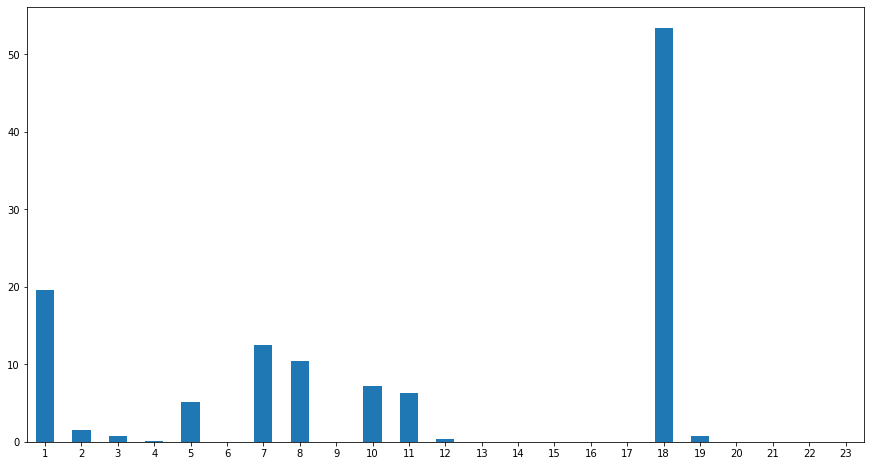

In [11]:
df_freq = pd.DataFrame(freq_treatments, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq = df_freq.rename(columns={"patient_nbr": "Treatments frequencies"})
df_freq = df_freq["Treatments frequencies"]
df_freq.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

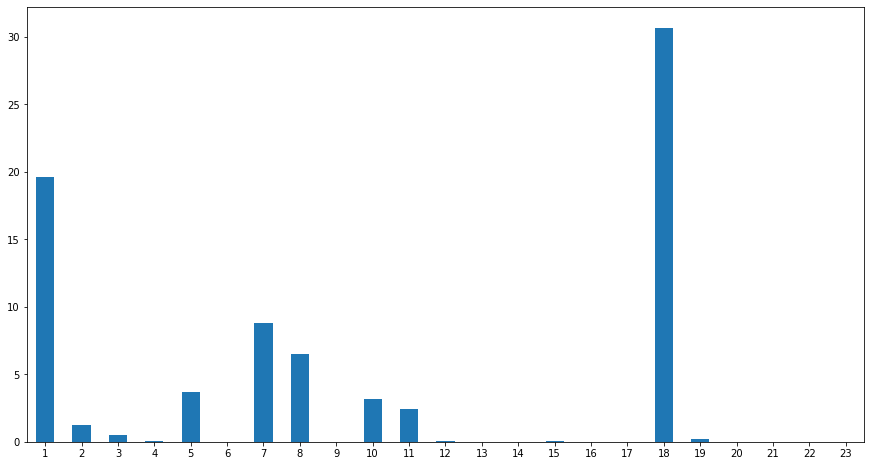

In [12]:
def count_treatments1(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T1'].str.contains(str(i)+'-', na=False) & ~df['T1'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments1 = normalize(count_treatments1(df2[["patient_nbr","T1"]]),101766)
df_freq1 = pd.DataFrame(freq_treatments1, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq1= df_freq1['patient_nbr']
df_freq1.plot.bar(rot=0, figsize=(15, 8))

The treatments 1 and 18 are way more present than any other one as a first treatment for diabete

<AxesSubplot:>

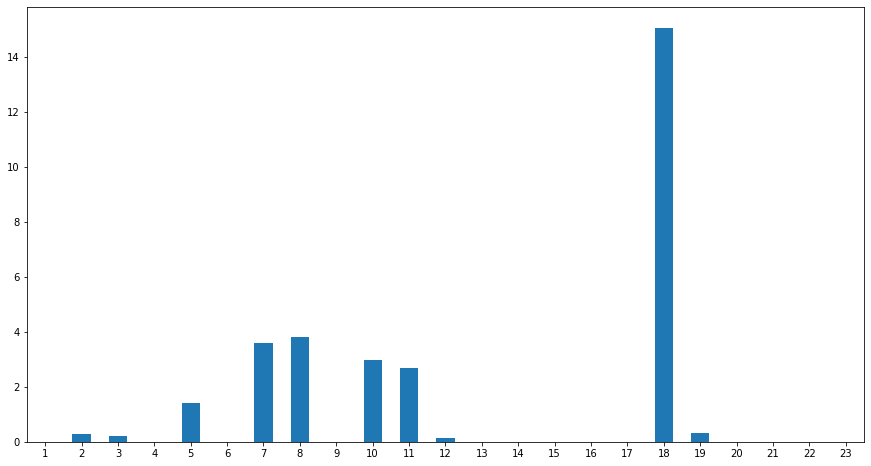

In [13]:
def count_treatments2(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T2'].str.contains(str(i)+'-', na=False) & ~df['T2'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments2 = normalize(count_treatments2(df2[["patient_nbr","T2"]]),101766)
df_freq2 = pd.DataFrame(freq_treatments2, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq2= df_freq2['patient_nbr']
df_freq2.plot.bar(rot=0, figsize=(15, 8))

However the treatment 1 disappear as soon as the second treatment, the treatment 18 staying on top

<AxesSubplot:>

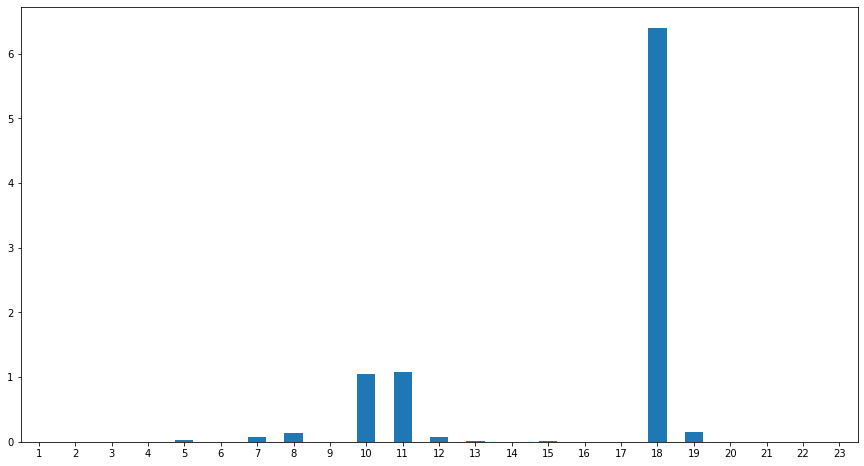

In [14]:
def count_treatments3(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T3'].str.contains(str(i)+'-', na=False) & ~df['T3'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments3 = normalize(count_treatments3(df2[["patient_nbr","T3"]]),101766)
df_freq3 = pd.DataFrame(freq_treatments3, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq3= df_freq3['patient_nbr']
df_freq3.plot.bar(rot=0, figsize=(15, 8))

The treatment 18 stays on top

<AxesSubplot:>

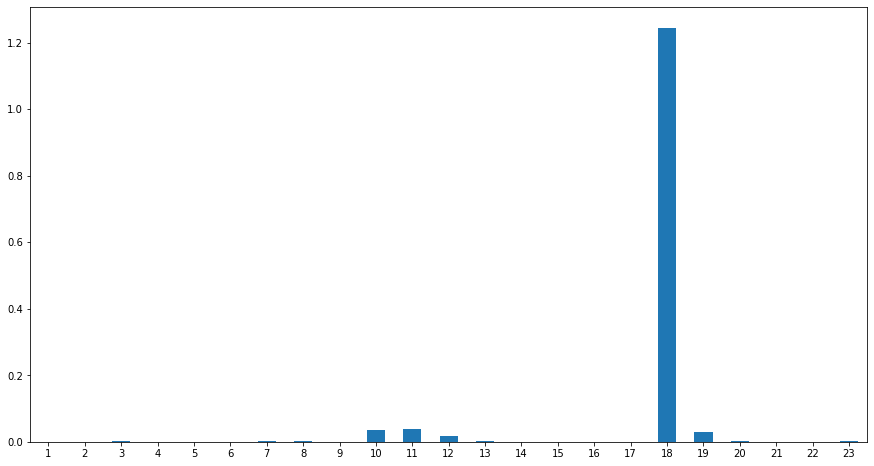

In [15]:
def count_treatments4(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T4'].str.contains(str(i)+'-', na=False) & ~df['T4'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments4 = normalize(count_treatments4(df2[["patient_nbr","T4"]]),101766)
df_freq4 = pd.DataFrame(freq_treatments4, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq4 = df_freq4['patient_nbr']
df_freq4.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

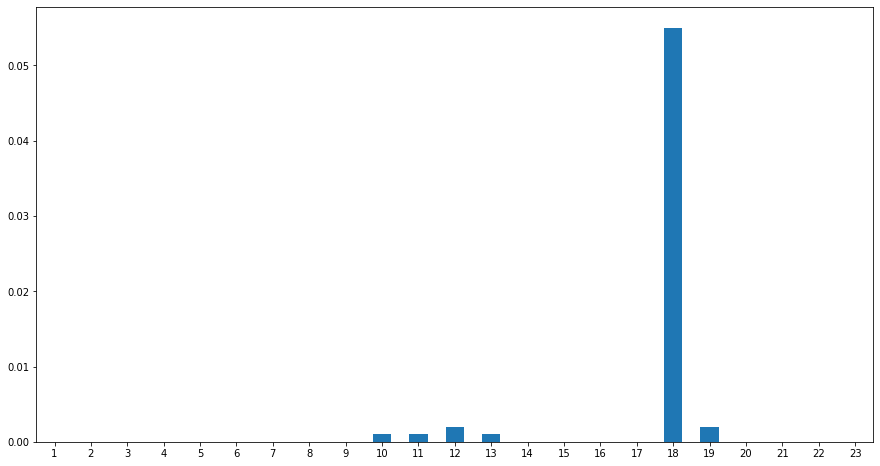

In [16]:
def count_treatments5(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T5'].str.contains(str(i)+'-', na=False) & ~df['T5'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments5 = normalize(count_treatments5(df2[["patient_nbr","T5"]]),101766)
df_freq5 = pd.DataFrame(freq_treatments5, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq5= df_freq5['patient_nbr']
df_freq5.plot.bar(rot=0, figsize=(15, 8))

<AxesSubplot:>

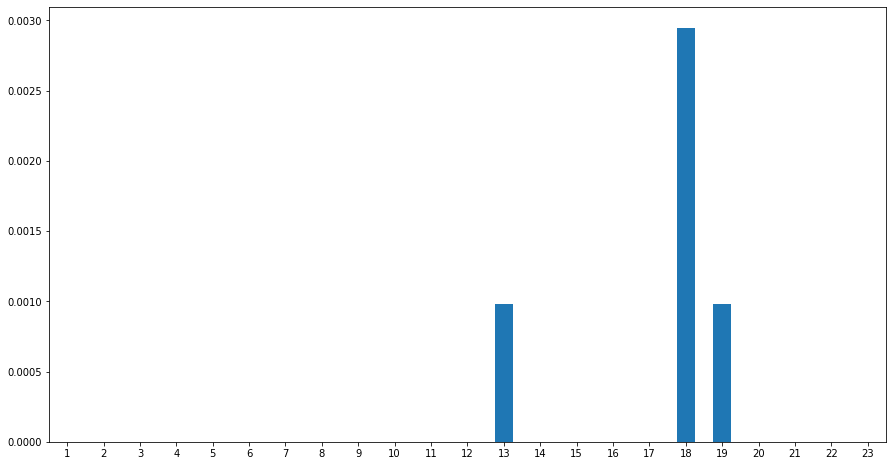

In [17]:
def count_treatments6(df):
    contained=[]
    for i in range(1,24):
        contain_values = df[df['T6'].str.contains(str(i)+'-', na=False) & ~df['T6'].str.contains(str(i+10)+'-', na=False)].count() 
        contained.append(contain_values)
    return contained

freq_treatments6 = normalize(count_treatments6(df2[["patient_nbr","T6"]]),101766)
df_freq6 = pd.DataFrame(freq_treatments6, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_freq6= df_freq6['patient_nbr']
df_freq6.plot.bar(rot=0, figsize=(15, 8))

In the end, the treatment 18 stays dominant through all 6 tratments. The fact that it is the insulin explains its omnipresence, as it is the hormone diabetes people are missing and need the most, which make it the primary treatment.

We are now gonna check what treatment can complement it 

<AxesSubplot:xlabel='T2'>

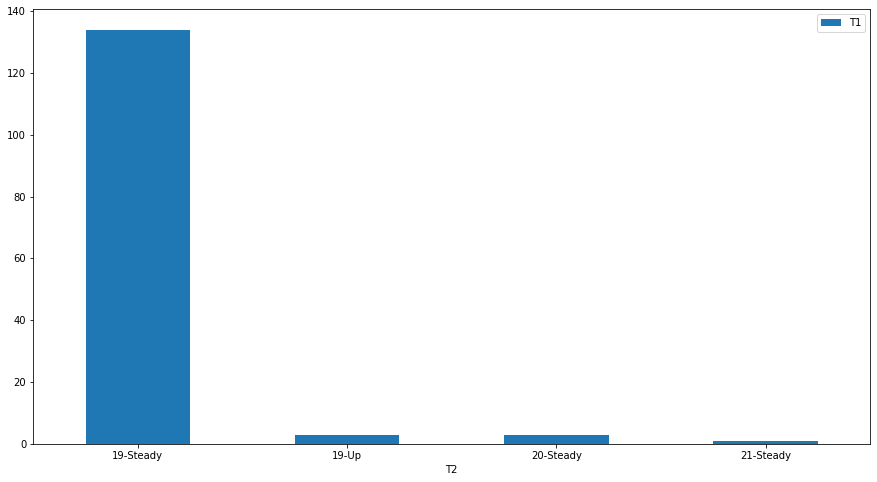

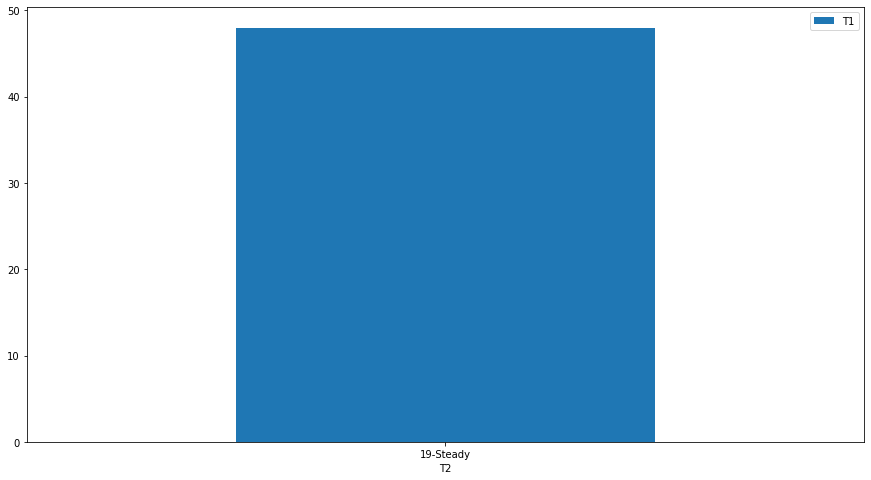

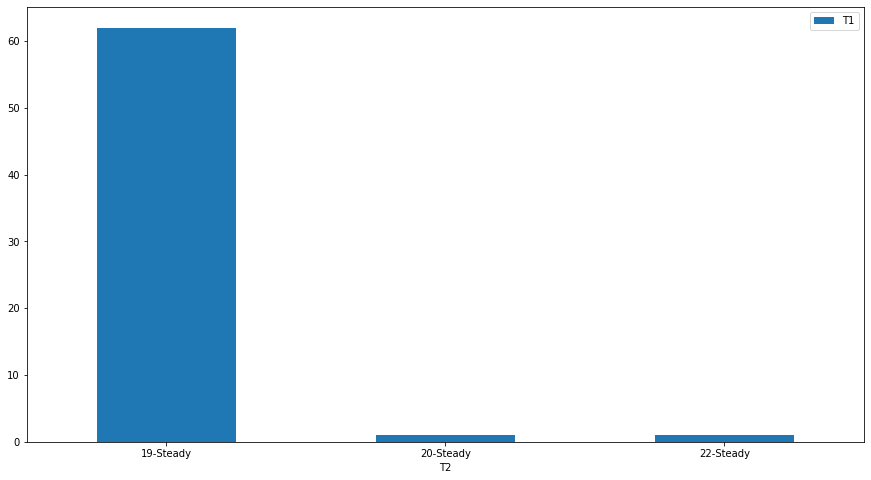

In [18]:
df_t18 = pd.DataFrame(df2[df2['T1'].str.contains('18', na=False)])
df_t18 = df_t18[["patient_nbr","T1","T2","T3","T4","T5","T6"]]
df_t18.groupby("T1").count()

df_t18_steady = df_t18[df_t18['T1'].str.contains('Steady', na=False)]
df_t18_steady = df_t18_steady[["T1","T2"]].groupby("T2").count()
df_t18_steady.plot.bar(rot=0, figsize=(15, 8))

df_t18_up = df_t18[df_t18['T1'].str.contains('Up', na=False)]
df_t18_up = df_t18_up[["T1","T2"]].groupby("T2").count()
df_t18_up.plot.bar(rot=0, figsize=(15, 8))

df_t18_down = df_t18[df_t18['T1'].str.contains('Down', na=False)]
df_t18_down = df_t18_down[["T1","T2"]].groupby("T2").count()
df_t18_down.plot.bar(rot=0, figsize=(15, 8))

We can see that the only treatments given to someone to complement insulin are the treatments 19, 20, 21 and 22. 

# Traitement age


In [19]:
df_age = df2[["patient_nbr","age","T1","T2","T3","T4","T5","T6","readmitted"]]
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6,readmitted
0,8222157,[0-10),NaN,NaN,NaN,NaN,NaN,NaN,0
1,55629189,[10-20),18-Up,NaN,NaN,NaN,NaN,NaN,0
2,86047875,[20-30),7-Steady,NaN,NaN,NaN,NaN,NaN,0
3,82442376,[30-40),18-Up,NaN,NaN,NaN,NaN,NaN,0
4,42519267,[40-50),7-Steady,18-Steady,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
101761,100162476,[70-80),1-Steady,18-Down,NaN,NaN,NaN,NaN,0
101762,74694222,[80-90),18-Steady,NaN,NaN,NaN,NaN,NaN,0
101763,41088789,[70-80),1-Steady,18-Down,NaN,NaN,NaN,NaN,0
101764,31693671,[80-90),7-Steady,10-Steady,18-Up,NaN,NaN,NaN,0


In [20]:
df_age=df_age.sort_values(by=['age',"T1","T2","T3","T4","T5","T6"])
df_age

,patient_nbr,age,T1,T2,T3,T4,T5,T6,readmitted
3764,3355146,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN,0
5861,114570648,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN,0
11651,15778395,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN,0
13190,18840807,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN,0
13578,10799190,[0-10),18-Down,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
101452,102128841,[90-100),NaN,NaN,NaN,NaN,NaN,NaN,0
101582,91148022,[90-100),NaN,NaN,NaN,NaN,NaN,NaN,1
101694,79902171,[90-100),NaN,NaN,NaN,NaN,NaN,NaN,0
101696,91200537,[90-100),NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
df_age_count_values = df_age.groupby("age").count()
df_age_count_values = df_age_count_values[["readmitted"]]
df_age_count_values = df_age_count_values.rename(columns={"readmitted": "total"})
df_age_count_values

,total
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


Here we find the total number of patient from each age group

In [22]:
df_age_count_values_readmitted = df_age[df_age.readmitted == 1].groupby("age").count() 
df_age_count_values_readmitted = df_age_count_values_readmitted[["readmitted"]]
df_age_count_values_readmitted

,readmitted
age,
[0-10),3
[10-20),40
[20-30),236
[30-40),424
[40-50),1027
[50-60),1668
[60-70),2502
[70-80),3069
[80-90),2078


And here we find the number of patient readmitted from each age group

In [23]:
df_age_readmitted = pd.concat([df_age_count_values_readmitted, df_age_count_values], axis=1)
df_age_readmitted

,readmitted,total
age,,
[0-10),3,161
[10-20),40,691
[20-30),236,1657
[30-40),424,3775
[40-50),1027,9685
[50-60),1668,17256
[60-70),2502,22483
[70-80),3069,26068
[80-90),2078,17197


<AxesSubplot:xlabel='age'>

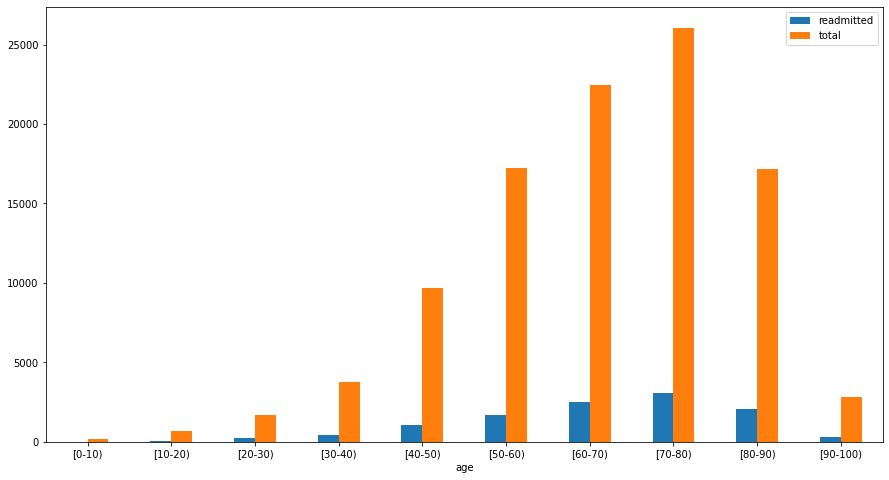

In [24]:
df_age_readmitted.plot.bar(rot=0, figsize=(15, 8))

By combining them both we managed to create this graph that compares them to allow us to see the tendency, which is that people between 40 and 90 years ols are more likely to both be diabetic and readmitted to the hospital after being hospitalized

# Traitement ethnies


Here, we decide to look at the possibility that the race could be impactful on the readmission probability

In [25]:
df_race = df2[["race","T1","T2","T3","T4","T5","T6", "readmitted"]]
df_race = df_race.sort_values(by=['race',"T1","T2","T3","T4","T5","T6"])
df_race = df_race.drop(df_race[df_race.race == ""].index)
df_race_readmitted = df_race[df_race.readmitted == 1]

In [26]:
df_race_count_values = df_race.groupby("race").count()
df_race_count_values = df_race_count_values[["readmitted"]]
df_race_count_values = df_race_count_values.rename(columns={"readmitted": "total"})
df_race_count_values

,total
race,
AfricanAmerican,19210
Asian,641
Caucasian,76099
Hispanic,2037
Other,1506


In [27]:
df_race_count_values_readmitted = df_race_readmitted.groupby("race").count()
df_race_count_values_readmitted = df_race_count_values_readmitted[["readmitted"]]
df_race_count_values_readmitted

,readmitted
race,
AfricanAmerican,2155
Asian,65
Caucasian,8592
Hispanic,212
Other,145


In [28]:
df_race_readmitted = pd.concat([df_race_count_values_readmitted, df_race_count_values], axis=1)
df_race_readmitted

,readmitted,total
race,,
AfricanAmerican,2155,19210
Asian,65,641
Caucasian,8592,76099
Hispanic,212,2037
Other,145,1506


We find those numbers and decide to compare them through a graphic 

<AxesSubplot:xlabel='race'>

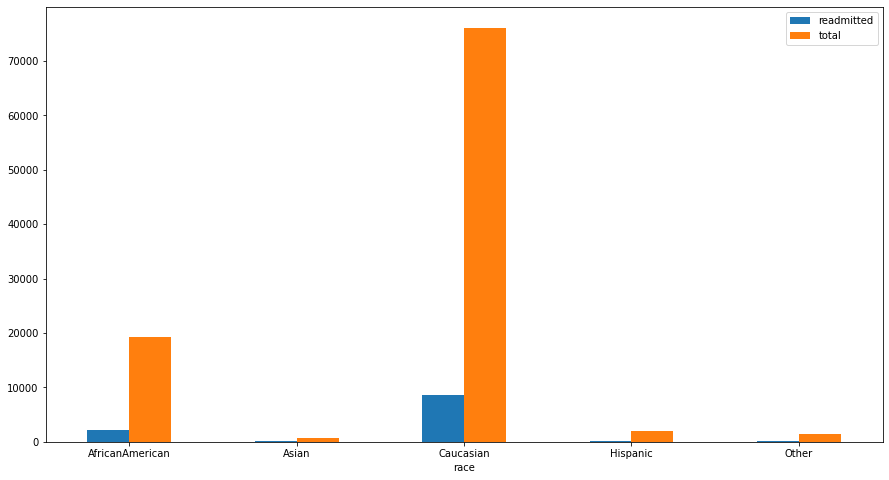

In [29]:
df_race_readmitted.plot.bar(rot=0, figsize=(15, 8))

As this graphic doesn't really allow us to determine anything, we decide to do somme piecharts of every single race defined

array([<AxesSubplot:ylabel='AfricanAmerican'>,
       <AxesSubplot:ylabel='Asian'>, <AxesSubplot:ylabel='Caucasian'>,
       <AxesSubplot:ylabel='Hispanic'>, <AxesSubplot:ylabel='Other'>],
      dtype=object)

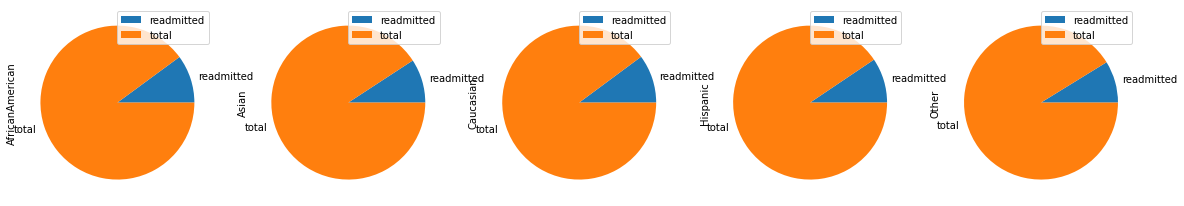

In [30]:
df_race_readmitted.transpose().plot.pie(subplots=True, figsize=(20, 20))

Looking at those graphs, we see that the proportion of readmitted people is the same no matter the race. We can conclude that the race really doesn't matter in the possibility of someone being readmitted, so we will remove this column from the dataset

In [31]:
df2 = df2.drop(columns=["race"])
df2

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,A1Cresult,change,diabetesMed,readmitted,T1,T2,T3,T4,T5,T6
0,8222157,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,NaN,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN
1,55629189,Female,[10-20),1,1,7,3,NaN,59,0,...,NaN,Ch,Yes,0,18-Up,NaN,NaN,NaN,NaN,NaN
2,86047875,Female,[20-30),1,1,7,2,NaN,11,5,...,NaN,No,Yes,0,7-Steady,NaN,NaN,NaN,NaN,NaN
3,82442376,Male,[30-40),1,1,7,2,NaN,44,1,...,NaN,Ch,Yes,0,18-Up,NaN,NaN,NaN,NaN,NaN
4,42519267,Male,[40-50),1,1,7,1,NaN,51,0,...,NaN,Ch,Yes,0,7-Steady,18-Steady,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,Male,[70-80),1,3,7,3,NaN,51,0,...,>8,Ch,Yes,0,1-Steady,18-Down,NaN,NaN,NaN,NaN
101762,74694222,Female,[80-90),1,4,5,5,NaN,33,3,...,NaN,No,Yes,0,18-Steady,NaN,NaN,NaN,NaN,NaN
101763,41088789,Male,[70-80),1,1,7,1,NaN,53,0,...,NaN,Ch,Yes,0,1-Steady,18-Down,NaN,NaN,NaN,NaN
101764,31693671,Female,[80-90),2,3,7,10,Surgery-General,45,2,...,NaN,Ch,Yes,0,7-Steady,10-Steady,18-Up,NaN,NaN,NaN


In [32]:
df2.to_csv("Backend/dataset/diabetic_data_filtered.csv")

# Modelisation

# Pre-processing

We are looking to try to use our dataset to create prediction model as precise as possible. We need to start by modifying the dataset so every string column is changed into a float value, as the models do not care for string at all

In [33]:
def unique_map(dataframe: pd.DataFrame, col: str):
    Tn = ["T1", "T2", "T3", "T4", "T5", "T6"]
    if col in treatments:
        values = ['No', 'Steady', 'Down', 'Up']
    elif col in ['diag_1','diag_2','diag_3']:
        values = list(set(df['diag_1'].unique().astype("str").tolist() + df['diag_2'].unique().astype("str").tolist() + df['diag_3'].unique().astype("str").tolist()))
        values.sort()
    elif col in Tn:
        values = []
        for T in Tn:
            values += df[T].unique().astype("str").tolist()
        values = list(set(values))
        values.sort()
    else:
        values = dataframe[col].unique().astype("str").tolist()
        values.sort()
    for val in values:
        dataframe[col] = dataframe[col].replace(val, values.index(val))
    return values

dic = {}
df1 = df.copy()
cols = ["gender", "age", "medical_specialty", "A1Cresult", 'change', 'diabetesMed','diag_1','diag_2','diag_3'] + treatments
for col in cols:
    val = unique_map(df1, col)
    dic[col] = val

joblib.dump(dic, "Backend/dic.joblib")
df1 = df1.drop(columns=["race", "patient_nbr"])
df1 = df1.replace(np.nan, -1)

In order to achieve a prediction, we changed the qualitative variables to pseudo-quantitative variables by giving them all a number, thus, every column used for a prediction is a number and can be exploited

We start by trying to apply a RandomForest to our dataset after creating our train and test sets

In [34]:
df1 = df1.replace(np.nan, "None")
X = df1.drop(columns=["readmitted"])
Y = df1[['readmitted']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)

C:\Users\raph1\AppData\Local\Temp/ipykernel_30040/1400665421.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, Y_train)


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8882163351937741

In [38]:
joblib.dump(model1, "Backend/models/RandomForest.joblib")

['Backend/models/RandomForest.joblib']

We get an accuracy of 88,82% which seems acceptable.
We then try a decision tree

Decision Tree

In [39]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier()
model2.fit(X_train, Y_train)
Y_tree = model2.predict(X_test)

In [40]:
accuracy_score(Y_test, Y_tree)

0.796556874459555

In [41]:
joblib.dump(model2, "Backend/models/DecisionTree.joblib")

['Backend/models/DecisionTree.joblib']

We got a 79,66% accuracy whic is worse than the RF

KNN classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, Y_train)
Y_KNN = modelKNN.predict(X_test)

C:\Users\raph1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
accuracy_score(Y_test, Y_KNN)

0.8778397924691455

In [44]:
joblib.dump(modelKNN, "Backend/models/KNN.joblib")

['Backend/models/KNN.joblib']

The accuracy of 87,78% is almost as goo as the RF

Support Vector

In [45]:
from sklearn.svm import SVC
modelSVM = SVC()
modelSVM.fit(X_train, Y_train)
Y_SVM = modelSVM.predict(X_test)

C:\Users\raph1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
accuracy_score(Y_test, Y_SVM)

0.8881377250216178

In [106]:
joblib.dump(modelSVM, "Backend/models/SupportVector.joblib")

['Backend/models/SupportVector.joblib']

We got our best result yet with a 88,81% accuracy

Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']}
 ]
 #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', n_jobs=-1, verbose=3)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
parameters = {
    "n_estimators" : [10, 100, 500],
    "min_samples_leaf": [  3,   1,   7 ],
    "criterion" : ['giny', 'entropy']
}
grid_RF = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

The grid search wasn't succesful because it took way too long to compute